In [1]:
import inception5h
import math
import os
from os import listdir
import tensorflow as tf
import utils
import PIL.Image

from image_processing import process_and_save_img
from IPython.core.display import HTML
from IPython.display import display

/Users/stefantippelt/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# download deep dream model if it does not yet exist locally
inception5h.maybe_download()

Data has apparently already been downloaded and unpacked.


In [3]:
# load model
model = inception5h.Inception5h()

In [4]:
model.layer_tensors

[<tf.Tensor 'conv2d0:0' shape=(?, ?, ?, 64) dtype=float32>,
 <tf.Tensor 'conv2d1:0' shape=(?, ?, ?, 64) dtype=float32>,
 <tf.Tensor 'conv2d2:0' shape=(?, ?, ?, 192) dtype=float32>,
 <tf.Tensor 'mixed3a:0' shape=(?, ?, ?, 256) dtype=float32>,
 <tf.Tensor 'mixed3b:0' shape=(?, ?, ?, 480) dtype=float32>,
 <tf.Tensor 'mixed4a:0' shape=(?, ?, ?, 508) dtype=float32>,
 <tf.Tensor 'mixed4b:0' shape=(?, ?, ?, 512) dtype=float32>,
 <tf.Tensor 'mixed4c:0' shape=(?, ?, ?, 512) dtype=float32>,
 <tf.Tensor 'mixed4d:0' shape=(?, ?, ?, 528) dtype=float32>,
 <tf.Tensor 'mixed4e:0' shape=(?, ?, ?, 832) dtype=float32>,
 <tf.Tensor 'mixed5a:0' shape=(?, ?, ?, 832) dtype=float32>,
 <tf.Tensor 'mixed5b:0' shape=(?, ?, ?, 1024) dtype=float32>]

In [5]:
# create TensorFlow session
session = tf.InteractiveSession(graph=model.graph)

In [6]:
# Check which layers are available in the model
op = session.graph.get_operations()
[m.values() for m in op]

[(<tf.Tensor 'input:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'conv2d0_w:0' shape=(7, 7, 3, 64) dtype=float32>,),
 (<tf.Tensor 'conv2d0_b:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'conv2d1_w:0' shape=(1, 1, 64, 64) dtype=float32>,),
 (<tf.Tensor 'conv2d1_b:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'conv2d2_w:0' shape=(3, 3, 64, 192) dtype=float32>,),
 (<tf.Tensor 'conv2d2_b:0' shape=(192,) dtype=float32>,),
 (<tf.Tensor 'mixed3a_1x1_w:0' shape=(1, 1, 192, 64) dtype=float32>,),
 (<tf.Tensor 'mixed3a_1x1_b:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'mixed3a_3x3_bottleneck_w:0' shape=(1, 1, 192, 96) dtype=float32>,),
 (<tf.Tensor 'mixed3a_3x3_bottleneck_b:0' shape=(96,) dtype=float32>,),
 (<tf.Tensor 'mixed3a_3x3_w:0' shape=(3, 3, 96, 128) dtype=float32>,),
 (<tf.Tensor 'mixed3a_3x3_b:0' shape=(128,) dtype=float32>,),
 (<tf.Tensor 'mixed3a_5x5_bottleneck_w:0' shape=(1, 1, 192, 16) dtype=float32>,),
 (<tf.Tensor 'mixed3a_5x5_bottleneck_b:0' shape=(16,) dtype=float32>,),


In [14]:
model.layer_names

['conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed3a',
 'mixed3b',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b']

In [10]:
# available categories 

categories = ['cats', 'urban', 'landscape']

category = categories[0]

# set up paths where to pick up images from
# full_path = os.path.join(os.getcwd(), category)
full_path = os.path.join(os.getcwd(),'img', category)

In [11]:
files = os.listdir(full_path)

The image that will be processed: /Users/stefantippelt/deep-dream-viz/src/img/cats/cat1.jpg


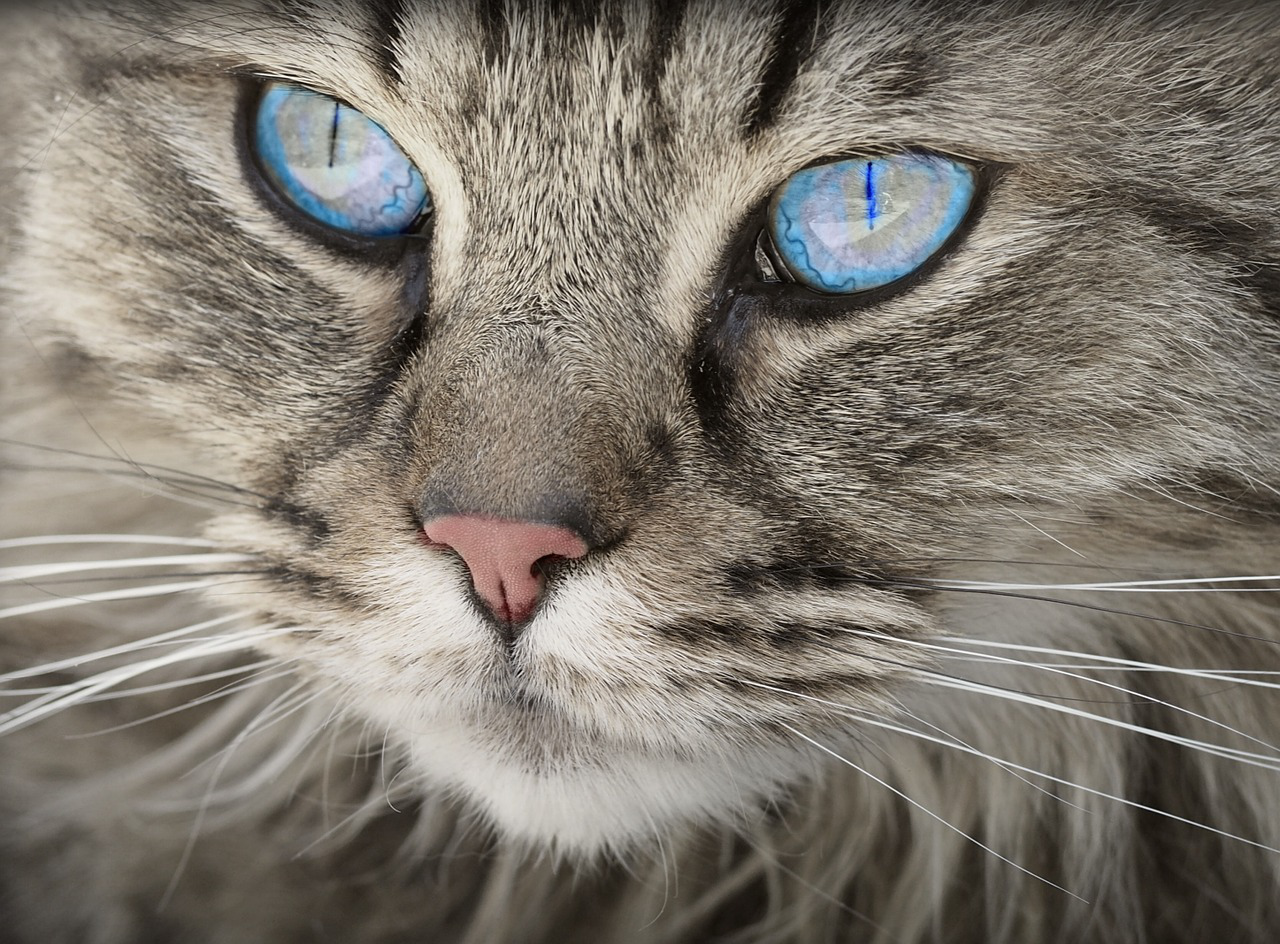

In [12]:
# reference picture you are interested in
filename = files[0]

filename_path = os.path.join(full_path, filename)


# load input image from folder
image = utils.load_image(filename=filename_path)
print('The image that will be processed:', filename_path)
# display(utils.plot_image(image))

utils.plot_image(image)

In [13]:
%%time
# create path where to store output images
output_path = full_path + '_output_' + os.path.splitext(filename)[0]
print('The resulting images are stored to the folder:', output_path)

# run the main function which processes the potential pieces of art and stores it to the output folder
img_dict = process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, 
                     model=model, session=session, speedup=True)

The resulting images are stored to the folder: /Users/stefantippelt/deep-dream-viz/src/img/cats_output_cat1
blend_number 0.0
Recursive level: 0
Processing image: 
Recursive level: 1
Processing image: 
Recursive level: 2
Processing image: 
Recursive level: 3
Processing image: 
saving image: cat1conv2d1_00_0.jpg
blend_number 0.2
Recursive level: 0
Processing image: 


KeyboardInterrupt: 

In [ ]:
HTML("""
<style>
* {
    box-sizing: border-box;
}

body {
    margin: 0;
    font-family: Arial;
}

.header {
    text-align: center;
    padding: 32px;
}

/* Create four equal columns that floats next to each other */
.column {
    float: left;
    width: 25%;
    padding: 10px;
}

.column img {
    margin-top: 12px;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes a two column-layout instead of four columns */
@media (max-width: 800px) {
    .column {
        width: 50%;
    }
}

/* Responsive layout - makes the two columns stack on top of each other instead of next to each other */
@media (max-width: 600px) {
    .column {
        width: 100%;
    }
}
</style>
""")

In [ ]:
# define output file
output_file = category + '_output_' + os.path.splitext(filename)[0] + '/'

# define list for images with different blend parameters
images0 = []
images2 = []
images4 = []
images6 = []

# get all images in directory
for image in listdir(os.path.join('img', output_file)):
    # store names of images with different blend parameters in subfolders
    blend0 = []
    blend2 = []
    blend4 = []
    blend6 = []
    
    # iterate through image dict and append to proper blend file
    for key, value in img_dict.items():
        if value['blend'] == 0.0:
            blend0.append(value['filename'])
        if value['blend'] == 0.2:
            blend2.append(value['filename'])
        if value['blend'] == 0.4:
            blend4.append(value['filename'])
        if value['blend'] == 0.6:
            blend6.append(value['filename'])

# create HTML output for the single blend parameters as separate columns
for image in blend0:
    img0 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images0.append(img0)

for image in blend2:
    img2 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images2.append(img2)

for image in blend4:
    img4 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images4.append(img4)

for image in blend6:
    img6 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images6.append(img6)

In [ ]:
# create HTML and pass images
HTML("""
<div class="row"> 
  <div class="column">
    {images0}
  </div>
  <div class="column">
    {images2}
  </div>
    <div class="column">
    {images4}
  </div>
    <div class="column">
    {images6} 
  </div>
</div>
""".format(images0="\n".join(images0), 
           images2="\n".join(images2), 
           images4="\n".join(images4), 
           images6="\n".join(images6), 
           images8="\n".join(images8)))